linear congruential generators (LCG’s)

$$x_{n+1} ≡ (a + b*x_n )mod m$$


While LCGs are capable of producing pseudorandom numbers which can pass formal tests for randomness, this is extremely sensitive to the choice of the parameters m and b.[clarification needed] For example, a = 1 and b = 1 produces a simple modulo-m counter, which has a long period, but is obviously non-random.

common choice 

In [35]:
def lcg(n, seed):
    b = 1140671485
    a = 128201163
    m = 2**24
    rand = [seed]
    i=1
    while i<n:
        rand.append((a + b*rand[-1]) % m)
        i+=1
    return [ra/m for ra in rand] ## to return [0,1] uniform distribution

In [1]:
def lcg2(modulus, a, b, seed):
    while Ture:
        seed = (a + b*seed) % modulus
        yield seed

 This random number generator can be shown to have period 2^24

In [36]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [37]:
randomnumber = np.array(lcg(100, 226))

In [11]:
len(randomnumber)

100

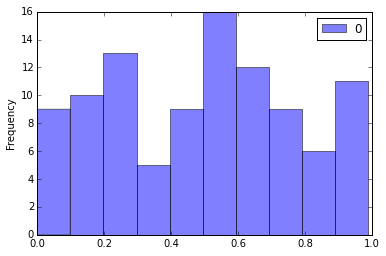

In [12]:
pd.DataFrame(randomnumber).plot.hist(alpha=0.5)

Yeah, it looks like uniform distribution, but how do you know for sure that it is unformaly distributed.
First based on law of large numbers

In [13]:
0.5 - 1/100*sum(randomnumber)

0.007005952596664422

In [14]:
import math
math.sqrt(1/12/100)

0.028867513459481287

In [15]:
(0.5 - 1/100*sum(randomnumber))/math.sqrt(1/12/100)

0.24269331705683772

cannot reject the null hypothesis that it is iid random numbers

– All MCG’s and LCG’s exhibit some positive autocorrelation. For example, in an
MCG, an extremely small value is always followed by another fairly small value.
For example in the MCG given above (b = 16807, m = 231 − 1), the frequency of
values less than 10000 is 104/2
31 ≈ 4.7×10−6
, but such a value is always followed
by a value less than 104 × 16807/2
31 ≈ 0.08 (on the (0, 1) scale)

Reservoir sampling is a family of randomized algorithms for randomly choosing a sample of k items from a list S containing n items, where n is either a very large or unknown number. Typically n is large enough that the list doesn't fit into main memory.


In [ ]:
def reservoirsampling(K, N):
    data = 
    

From (0, 1) uniform distribution to all other distribution

In [16]:
import math

In [17]:
#exponential:
#F−1(U) = −1/λ log(1 − U).

randomexp = pd.DataFrame([-10*math.log(ra) for ra in randomnumber])

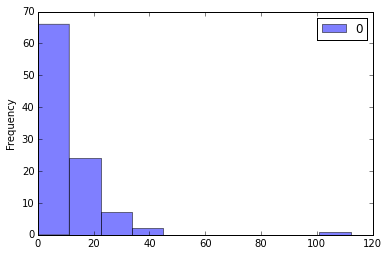

In [18]:
randomexp.plot.hist(alpha=0.5)

In [19]:
np.random.exponential(scale=1, size=None)

0.18991393493393144

In [20]:
randomexpcompare = pd.DataFrame(np.random.exponential(scale=1, size=100))

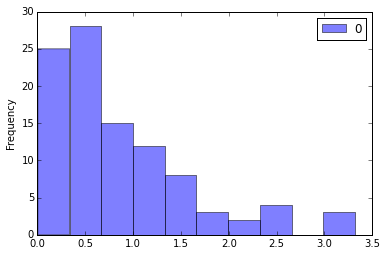

In [21]:
randomexpcompare.plot.hist(alpha=0.5)

In [22]:
randomlogit = pd.DataFrame([math.log(ra/(1-ra)) for ra in randomnumber])

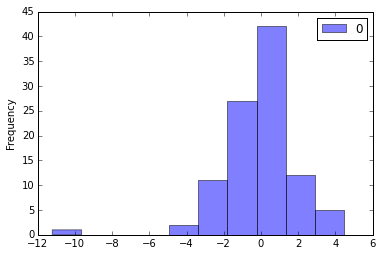

In [23]:
randomlogit.plot.hist(alpha=0.5)

In [24]:
## rejection sampling, sometimes it is hard to find the inversed CDF
float(1/8**5)

3.0517578125e-05

上来就让你自己写weighted sampling, 不能用existing function。 给两个vector, 一个是要选的数，另一个是相应的weight。 
我说根据相应的weight来replicate选择的数，再用一个uniform distribution来随即选index。
白人哥哥但是这样会有个问题，我说是阿，如果weight是小数的话就有问题，可以试着把weight vector整体乘一个很大的数，变成整数之类的。。。。

第一题可以用rejection sampling的方法
假设 samples = [1,2,3,4,5]
weights = [0.1,0.1,0.2,0.2,0.4]
可以generate一个随机i of vector index (i = 1 to 5 in this case), 
再generate一个uniform [0,1]之间的随机数 prob，
if prob <= weights[i] then output samples[i], else break, jump to next iteration. 1

The important things is to bound the whole distribution, which means actually most of you samplea are actually being wasted

In [25]:
def find_interval(x, partition):
    for i in range(len(partition)):
        if x < partition[i]:
            return i-1
    return -1
 
Interval = [0, 3, 5, 7.8, 9, 12, 13.8, 16]
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 10.8, 13.9, 15, 16, 16.5]:
    print(find_interval(x, Interval), end=", ")

-1, 0, 0, 1, 2, 2, 3, 4, 6, 6, -1, -1, 

In [85]:
import time

## rejection sampling
def weighted_sample(samples, weights, N):
    start_time = time.time()
    res=[]
    seeds=226
    k=2
    while len(res)<N:
        index = np.array(lcg(k, seeds))[-1]*len(samples)
        for i in range(len(samples)):
            if index<i+1:
                select = samples[i]
                break     
        k+=1
        prob = np.array(lcg(k, seeds*2))[-1]
        ## reject sampling
        if prob<=weights[i]:
            res.append(samples[i])
        k+=1
    print("--- %s seconds ---" % (time.time() - start_time))
    return res

## the inversion F method
def weighted_sample2(samples, weights, N):
    start_time = time.time()
    res = []
    k=2
    seeds=226
    weightcum = np.cumsum(weights)
    while len(res)<N:
        k+=1
        uniform_sample = np.array(lcg(k, seeds))[-1]
        for i in range(len(weights)):
            if uniform_sample<weightcum[i]:
                res.append(samples[i])
                break
    print("--- %s seconds ---" % (time.time() - start_time))
    return res

samples = [1,2,3,4,5,6]
weights = [0.05,0.1,0.1,0.15,0.2,0.4]

import collections
def countfrequency(samples):
    N = len(samples)
    dic = {}
    for i in range(N):
        dic[samples[i]] = dic.get(samples[i],0) + 1
    for k, v in dic.items():
        dic[k] = round(dic[k]/N,2)
    return collections.OrderedDict(sorted(dic.items()))


N=100
method1 = weighted_sample(samples, weights, N)
method2 = weighted_sample2(samples, weights, N)
## the F-1 is much faster than the rejection method


print(countfrequency(method1))
print(countfrequency(method2))

--- 0.4208383560180664 seconds ---
--- 0.003000497817993164 seconds ---
OrderedDict([(1, 0.04), (2, 0.1), (3, 0.08), (4, 0.22), (5, 0.17), (6, 0.39)])
OrderedDict([(1, 0.04), (2, 0.1), (3, 0.12), (4, 0.1), (5, 0.27), (6, 0.37)])


Another rejection sampling
Rejection sampling is typically used to generate draws from complicated distributions that
arise in specialized problems (these distributions are too particular to have names). Among
the classical distributions, most can be simulated using a deterministic operation on a uniform
draw. The gamma distribution is more challenging, and cannot be handled in this way.
Therefore draws from the gamma distribution are usually generated via rejection sampling.

Any way to optimize this?

If making step 3 to O(1) is hard, let’s try make it O(logN). The first thing we should consider is binary search. If we keep an array that each element is the accumulative sum of weights of all the previous elements, we can do a binary search to locate the element. This improves the algorithm to O(logN) (excluding the preprocessing).

In [2]:
alpha = 3
beta = 1
L = math.sqrt(2*alpha - 1)
n = 0
N = 1000
seed= 226
for i in range(len(N)):
    while True:
        n+=1
        u = np.array(lcg(n, seeds))[-1]
        ## the key is to know that the following X has density proportional of f(x)
        x = alpha*(u/(1-u))**(1/L)
        g = -x + (alpha-1)*math.log(x) - math.lgamma(alpha)
        f = log(4) -alpha + (L+alpha)*log(alpha) + (L-1)*log(x) - math.lgamma(alpha) - 2*log(alpha^L + x^L)
        np.array(lcg(n, seeds))[-1]
        if (log(rand(1,1)) < g-f)
G(i) = x;
break
        

SyntaxError: invalid syntax (<ipython-input-2-3c655fa7591e>, line 16)

Since Rejection sampling is so slow, throwing x away seems wasteful. then what about write the integral **as an expectation under** Q

$$ \int f(x)P(x) dx = \int f(x)\dfrac{P(x)}{Q(x) }dx = (1/S)*\sum(f(x)*\dfrac{P(x)}{Q(x)}),  x \subset Q(x)$$

here, $p(x)/Q(x)$ is the importance of the sample, it's like softly rejecting, with some importance calculated as weights. This works when we don't care about the samples itself but focus on the expectation

the choice of Q(X) should covers the range of the P(X), 

给你所有trip的起点和终点，如何将uber的trip从地理上分成不同的group，
从而group之间的trips尽量少，如果你只能sample其中20%的数据点你会怎么sample，
不同sample method的区别，如何保证你的模型两年后不做任何改变也还能用？


reusable pipline to generate features.
detailed documentations, examples, 

model and parameters, trained on a retaive long time and large dataset, use cross-validation to make sure that parameters learned are not overfitting to a small data. 

*Stratified Sampling* is possible when it makes sense to partition the population into groups based on a factor that may influence the variable that is being measured.   These groups are then called strata.  An individual group is called a stratum.  With stratified sampling one should:

partition the population into groups (strata)
obtain a simple random sample from each group (stratum)
collect data on each sampling unit that was randomly sampled from each group (stratum) 
Stratified sampling works best when a heterogeneous population is split into fairly homogeneous groups.  Under these conditions, stratification generally produces more precise estimates of the population percents than estimates that would be found from a simple random sample. Table 3.2 shows some examples of ways to obtain a stratified sample.


*Cluster Sampling* is very different from Stratified Sampling. With cluster sampling one should

divide the population into groups (clusters).
obtain a simple random sample of so many clusters from all possible clusters.
obtain data on every sampling unit in each of the randomly selected clusters.
It is important to note that, unlike with the strata in stratified sampling, the clusters should be microcosms, rather than subsections, of the population.   Each cluster should be heterogeneous. Additionally, the statistical analysis used with cluster sampling is not only different, but also more complicated than that used with stratified sampling.

In [27]:
import random
def random_subset(iterator, K ):
    result = []
    N = 0

    for item in iterator:
        N += 1
        if len( result ) < K:
            result.append( item )
        else:
            s = int(random.random() * N)
            if s < K:
                result[ s ] = item

    return result

In [28]:
random_subset(samples, 2)

[1, 5]

why need sampling

applied to bayesian any expection, new quantity
more exaple E-step statistics in EM, boltzman machine 


MCMC

We are constructing a biased random walk that explores a target distribution, so it gives approximate, correlated samples

estimator is unbiased, varaince shrinks with 1/sqrt(s)

### rejection > importance sampling > Metropolis-Hastings > gibbs sampling

MCMC的应用是和"维数灾难"有关的。考虑一个R上的分布，如果我们要计算它的数学期望，采用题主所描述的"等距计算"，那么取100个点大致可以保证精度。然而考虑一个R^50的分布，这时候要采用"等距计算"就要在每个维度上取100个点，这样一来就要取10^100个点。作为对比，已知宇宙的基本粒子大约有10^87个。如果仔细观察"等距计算"的结果，就会发现绝大多数点算出的概率都很小，而少部分点的概率非常大。而如果我们忽略大多数概率小的点，只计算概率大的那小部分点，对最后数学期望的结果影响非常小。这是MCMC思路的直观部分。MCMC应用的概率模型，其参数维数往往巨大，但每个参数的支撑集非常小。比如一些NLP问题的参数只取{0,1}，但维数往往达到几千甚至上万左右，这正说明了MCMC更适用这些问题。



在高维空间采样的时候，接受拒绝算法基本上是不可用的，见高维灾难。
简而言之就是，用简单的接受/拒绝算法，采样所需的样本量（或者说接受的概率）随空间维数增加而指数增长。
Metropolis-Hasting 主要解决的就是这个问题，使用一个会收敛到目标分布的马尔科夫链来进行采样。
你在题目里说的没有错，接受-拒绝算法可以视作一个每一步都独立取样的 Metropolis，
但是这也就是高维灾难的根源：在高维空间里，分布密度往往是稀疏的，意味着每一步独立取样的话，
绝大多数样本将被拒绝；假如使用马尔科夫链的话，则因为“跳跃分布”（也就是你所说的g(y|x)）通常是以当前态为中心，
得到相同数量的接受样本需要的采样量要低得多。当然，如果是多变量的联合分布（也可以视为分布复杂的超高维度取样），
即使用 Metropolis 也会显得不够（因为超高维情况下跳跃分布很难选取，而且很多时候联合分布用解析表示非常困难，只能用一大堆条件分布来表达），
这时候就应该选用 Gibbs Sampling，简而言之就是把 Metropolis-Hasting 中的一大步分解为 N 小步
（其中N可以是维度数，也可以是多变量中的变量数），
每一小步只根据上一大步的状态和这一大步已经选取了的维度/变量，使用维度/变量间的条件概率采样一个新变量/维度。



Metropolis-Hastings algorithm is another sampling algorithm to sample from high dimensional, difficult to sample directly (due to intractable integrals) distributions or functions.

It’s an MCMC algorithm, just like Gibbs Sampling. It’s MC (Markov Chain) because to get the next sample, one only need to consider the current sample. It’s MC (Monte Carlo) because it generates random sample which we could use to compute integrals or numerical results, for example in the probability distribution setting, the integrals we may want to compute are the expected value, mode, median, etc.

在Metropolis-Hastings里面提到，遇到多元分布的时候，选取初始值非常困难，
在每一个维度上都必须恰到好处。而Gibbs Sampling则是专门解决此类问题的算法，它对每一维进行同时的单独算法迭代。

This is because Gibbs Sampling is derived from Metropolis-Hastings, with special case, i.e. the acceptance probability of Gibbs Sampling is 1, so it will always accept the sample drawn from the conditional distributions.

Gibbs sampling 算法是 Metropolis-Hasting 算法的一个特例。很鸡贼的一个特例。m 维的一个样本跳转到另一个样本的过程，可以拆解为 m 个子过程，每一个子过程对应一个维度。这时概率转移矩阵是 m 个子概率转移矩阵之积，

## let's do a metropolis-hasting sampling

two requirement for metrpolis-hasting:

Towards designing general purpose MCMC transition operators we have
1. One way to ensure T the is ergodic, i.e. a way to ensure T avoidstraps and can visit everywhere in our state space
2. A sufficient condition to ensure that T has the equilibrium distribution π we want (via detailed balance)



it construct a **biased random walk** that explores target dist P(x)
MCMC gives apporximately correlated samples from P(X), there will be some buring steps since the initial points are random. It's still unbiased estimator though samples are correlated

MCMC has something to do with the eigenvector as well

P is an **invariance distribution** of T because the trasiction distribution of P(TP=P) has P as eigen vector of T with eigen value of 1. for any vector a = (0,0,1), $T^{100}*a=P$. This is a transiction matrix that allow me to sample from P

If a transition operator satisfies detailed balance w.r.t. a particular distribution then that distribution will be invariant under T.

So a Markov chain designed to satisfy detailed balance will have p(x) as its stationary distribution.

All we need to do is to construct a trasition operator that satisfy detailed balance w.r.t. our target distribution




### ergodictive 

We must further restrict our choice of T to ergodicity.

Among other things, poorly designed T’s could partition space (the “set of
states”) such that some subsets are unreachable from others.


对于马尔可夫链，需要注意以下的两点：


1、周期性：即经过有限次的状态转移，又回到了自身；

2、不可约：即两个状态之间相互转移；

如果一个马尔可夫过程既没有周期性，又不可约，则称为各态遍历的。


对于一个各态遍历的马尔可夫过程，无论初始值π(0)取何值，随着转移次数的增多，随机变量的取值分布最终都会收敛到唯一的平稳分布π∗

There are requirement for T: requries:
$T^K(x^{'}<-x)>0$ for all $x^{'}$, $P(x^{'})>0$ for some K

So the key right now is that we have a vector space, we want to construct a distribution that has this eigen vector. How to get this distribution?

并不是转移矩阵P必须满足细致平稳条件（必要条件），而是如果马氏链的转移矩阵P满足细致平稳条件，即π(i)Pij=π(j)Pji，则则 π(x) 是马氏链的平稳分布（充分条件）。平稳分布是说：状态空间中的任意一个状态，从这个状态出去的量和从其他状态进来的量一致。那么细致平稳条件就更加严格：任意两个状态i,j，从i到j的量和从j到i的量一致。因此若满足细致平稳条件则可推出该马氏链有平稳分布。


**Detailed Balance** can help since it implies the invariant condition：

如何判断一个马尔科夫链是否能收敛到平稳分布，以及如何判断一个状态分布是不是一个马尔科夫链的平稳分布呢？我们有下面定理。

细致平衡条件: **已知各态历经的的马尔科夫链有概率转移矩阵 p** ，以及已知状态分布 π 。如果对于任意两个状态 i 和 j，下面公式成立，则马尔科夫链能够收敛到 π 。

$π(i)p(j|i)=π(j)p(i|j)$

这里的各态历经是指任意两个状态之间可以通过有限步到达。


MCMC 方法的基本原理是利用细致平衡条件构建一个概率转移矩阵，使得目标概率就是概率转移矩阵的平稳分布。 Metropolis-Hasting 和 Gibbs sampling 算法本质上是构建概率转移矩阵的不同方法。


Transition Operator that meet the detailed balance
1. propose a move from the current state $Q(x^{'};x)$, e.g $N(x, \sigma^2)$, **this proposal depend on x from current state**
2. Accept with probability $min(1, \dfrac{P(x^{'})Q(x;x^{'})}{P(x)Q(x^{'};x)})$
3. Otherwise next state in chain is a copy of current state

#### Gibbs sampling

Metropolis limitation:
generic proposal use Q(x';x) = N(x. $\sigma^2$), the choice of $\sigma$ is important, and the $\sigma$ at different dimension sometimes need to be very different(for example, in linear regression the intercept and slope migh be very negatively correlated). 


缺点：

1. 样本自相关：相邻的样本会相互相关，虽然可以通过每n步取样的方式来减少相关性，但这样的后果就是很难让样本近似于目标分布P(x)。

2. 初始值的选择：尽管Markov Chain最后都会收敛到目标分布，然而初始值的选择直接影响到运算时间，尤其是把初始值选在在了“低密度”区域。因此，选择初值时，最好加入一个“burn-in period”（预烧期，预选期）。




combining operator--- Gibbs sampling
if $T_a,T_b,T_c$ are all invariant, then $T_a*T_b*T_c$ is invariant

A method with no rejections:
1. initialize X to some value
2. pick each variable in turn or randomly and resample $P(x_i|x_j)$

proof of validity:
1. check detailed balance for component update
2. proposal $P(x_i|x_j)$ accept with prob.1 



0.00632453617818


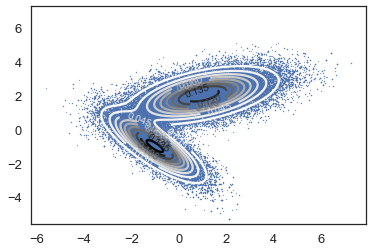

In [135]:
## Metropolis
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
 
def q(x, y):
    # matplotlib.mlab.bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0, sigmaxy=0.0)
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+28.4*g2/(0.6+28.4)

def metropolis_hasting(q, N = 10000, s =5):
    '''Metropolis Hastings'''
    r = np.zeros(2)
    p = q(r[0], r[1])
    print(p)
    samples = []
    for i in range(N):
        rn = r + np.random.normal(size=2)
        pn = q(rn[0], rn[1])
        ## accept using probability min(1, P())
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        if i % s ==0:
            samples.append(r)
    return samples

N=100000
samples = np.array(metropolis_hasting(q, N, s=1))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
 
    
'''Plot target'''
dx = 0.01
x = np.arange(np.min(samples), np.max(samples), dx)
y = np.arange(np.min(samples), np.max(samples), dx)
X, Y = np.meshgrid(x, y)
Z = q(X, Y)
CS = plt.contour(X, Y, Z, 10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

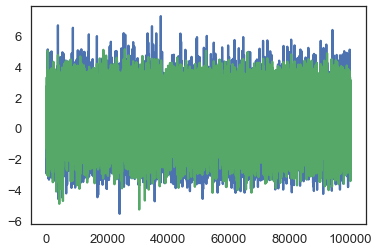

In [136]:
plt.plot(np.linspace(0, N, num=N), samples[:, 0])
plt.plot(np.linspace(0, N, num=N), samples[:, 1])

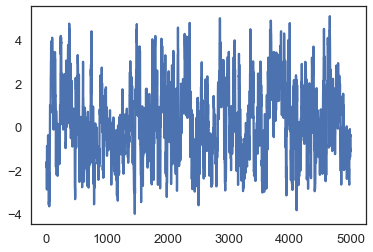

In [138]:
plt.plot(np.linspace(1, 5000, num=5000), samples[(N-5000):, 0])

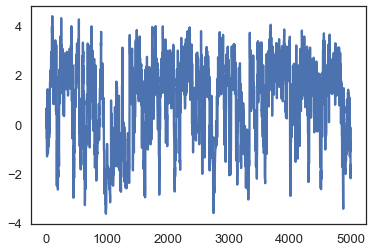

In [139]:
plt.plot(np.linspace(1, 5000, num=5000), samples[(N-5000):, 1])

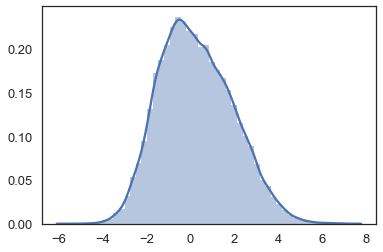

In [140]:
sns.distplot(samples[:, 0], label='Small step size')

*you cannot tell there's two distribution in one-dimentional plot*

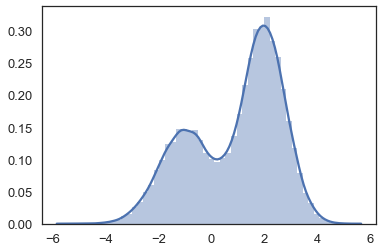

In [141]:
sns.distplot(samples[:, 1], label='Small step size')

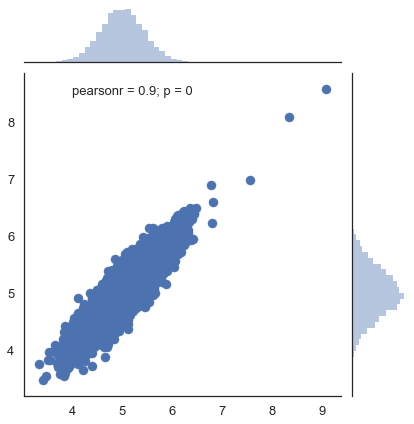

In [157]:
## Gibbs
import numpy as np
import seaborn as sns


def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mus, sigmas, iter=10000):
    samples = np.zeros((iter, 2))
    y = np.random.rand() * 10

    for i in range(iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples


if __name__ == '__main__':
    mus = np.array([5, 5])
    sigmas = np.array([[1, .9], [.9, 1]])

    samples = gibbs_sampling(mus, sigmas)
    sns.jointplot(samples[:, 0], samples[:, 1])

In [33]:
## Gibbs sampling for Bayesian regression

import numpy as np

%matplotlib inline
from seaborn import plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10, 5)


### more details about MCMC

1. initiation point
2. multiple runs
3. how do we know its long enough?


## Reservior Sampling

for streaming data, not knowing size or cannot fit into memory. 
For linked list


In [19]:
import random
def reservoir_sampling(items, k):
    """
    Reservoir sampling for large sample space or unknow end list
    """
    sample = items[0:k]
    for i in range(k,len(items)):
        j = random.randrange(1, i+1)
        if j <= k:
            sample[j-1] = items[i]
    return sample

In [20]:
a = [i for i in range(20)]

In [29]:
reservoir_sampling(a,5)

[0, 1, 9, 3, 13]

MCMC

In [30]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

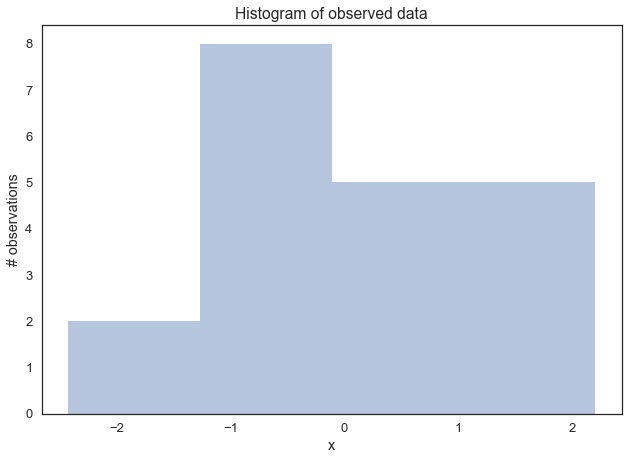

In [31]:
data = np.random.randn(20)
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

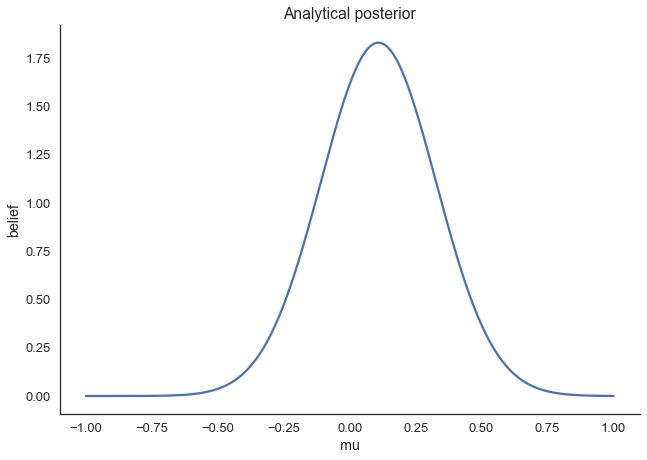

In [32]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()